In [250]:
import numpy as np
import tqdm
import geopandas
import pandas as pd

In [33]:
# Import a shape file with all the counties in the US
counties = geopandas.read_file('Usable data/Original counties data/')

# Turn state codes into numbers
for col in ['STATE_FIPS', 'CNTY_FIPS', 'FIPS']:
    counties[col] = counties[col].astype(int)

In [85]:
print(counties.shape)
counties.head(5)

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,geometry,risk1,risk2
1058,Moultrie,Illinois,17,139,17139,"POLYGON ((-88.47296653918187 39.4514847299729,...",0.2125,0.154444
2737,St. Helena,Louisiana,22,91,22091,"POLYGON ((-90.9085331941626 30.65369480008003,...",0.2750,0.101111
1691,Petersburg,Virginia,51,730,51730,POLYGON ((-77.38639245211395 37.24751404255153...,0.6375,0.811111
502,Butler,Iowa,19,23,19023,POLYGON ((-93.03066360106556 42.55188121884304...,0.2375,0.025556
1081,Frederick,Maryland,24,21,24021,POLYGON ((-77.67930191941035 39.31878101596426...,0.3000,0.023333


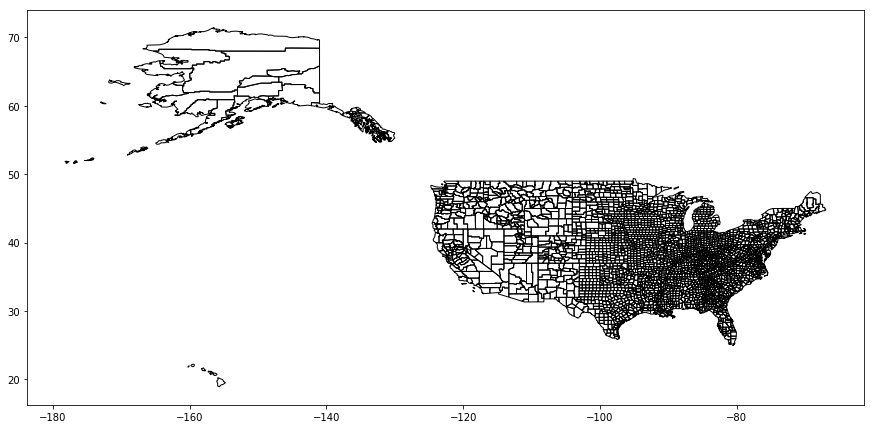

In [187]:
# Show what it looks like
counties.plot(facecolor='none', edgecolor='k', figsize=(15,15));

In [142]:
# Import a map of earthquake risk contour lines for the whole country.
quakes = geopandas.read_file('Datasets/stanford-rm034qp5477-geojson.json')

# The earthquake risk is a range of numbers, encoded as a string.  I'll
# turn that into a single float number that represents the center
# value of the range.  Anything marked '> 100' will get the value 110.

temp1 = quakes.percent_g.replace('> 100', '100 - 120')
range_limits = [x.split(' - ') for x in temp1]
range_averages = [(int(x[0]) + int(x[1]))/2 for x in range_limits]
quakes['pga'] = range_averages

# Drop useless columns
quakes = quakes.drop(columns=['id','percent_g','valley'])

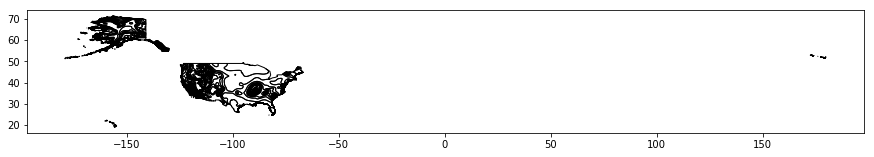

In [185]:
quakes.plot(facecolor='none', edgecolor='k', figsize=(15,15))

In [262]:
# For each county, I'll produce a single risk number that represents 
# the whole county.  It is the average of all the risk zones that 
# intersect that county.

# Create intersections
intersections = geopandas.sjoin(counties, quakes, how="inner", 
                                op='intersects')
# Calculate average risk per region
counties_avg_quake = intersections.dissolve(by='FIPS', aggfunc='mean')
avg_quake_dict = counties_avg_quake['pga'].to_dict()

In [273]:
counties['pga'] = counties['FIPS'].map(avg_quake_dict)


In [275]:
print(counties.shape)
counties.head()

(3141, 7)


,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,geometry,pga
0,Lake of the Woods,Minnesota,27,77,27077,"POLYGON ((-95.34283127277658 48.546679319076, ...",0.500000
1,Ferry,Washington,53,19,53019,POLYGON ((-118.8516288013387 47.94956368481996...,6.000000
2,Stevens,Washington,53,65,53065,"POLYGON ((-117.438831576286 48.04411548512263,...",5.500000
3,Okanogan,Washington,53,47,53047,"POLYGON ((-118.972093862835 47.93915200536639,...",8.333333
4,Pend Oreille,Washington,53,51,53051,POLYGON ((-117.4385804303028 48.99991850672649...,5.500000


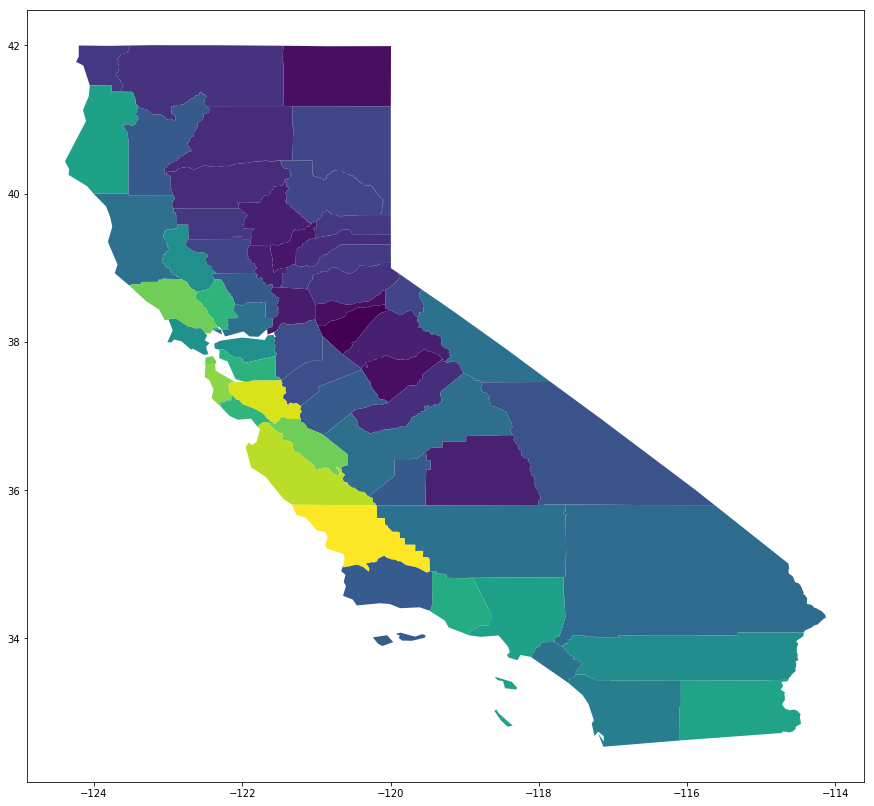

In [279]:
counties[counties.STATE_NAME=='California'].plot(column='pga', figsize=(15,15));

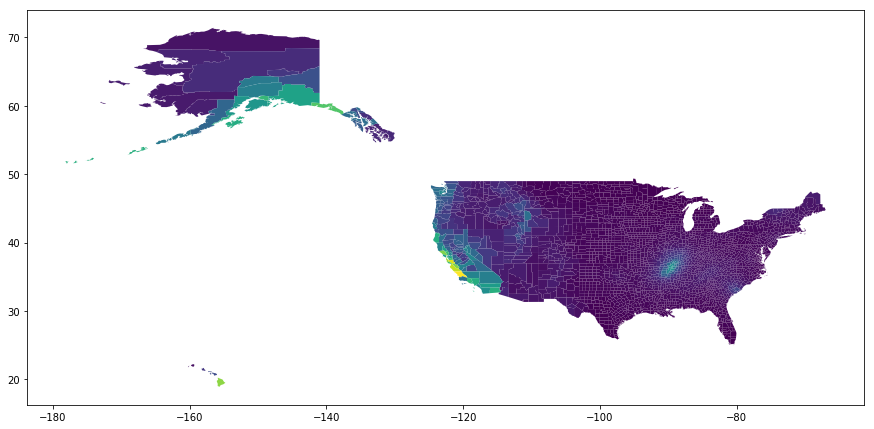

In [280]:
counties.plot(column='pga', figsize=(15,15));

In [281]:
type(counties)

geopandas.geodataframe.GeoDataFrame

In [282]:
counties.to_file('Usable data/counties3')

# Shreyas' stuff

In [286]:
shrey1 = pd.read_csv('incidentdf.csv').rename(columns={'County FIPS Code':'FIPS'})

In [287]:
shrey1.head()

,FIPS,Chemical,Coastal Storm,Dam/Levee Break,Drought,Earthquake,Fire,Fishing Losses,Flood,Freezing,...,Other,Severe Ice Storm,Severe Storm(s),Snow,Terrorist,Tornado,Toxic Substances,Tsunami,Typhoon,Volcano
0,1001,0,0,0,1,0,0,0,2,0,...,0,0,6,1,0,0,0,0,0,0
1,1003,0,0,0,1,0,0,0,2,0,...,0,0,8,1,0,1,0,0,0,0
2,1005,0,0,0,1,0,0,0,1,0,...,0,0,10,1,0,0,0,0,0,0
3,1007,0,0,0,1,0,0,0,1,0,...,0,0,5,1,0,0,0,0,0,0
4,1009,0,0,0,1,0,0,0,1,0,...,0,0,10,1,0,1,0,0,0,0


In [255]:
# shrey2 = pd.read_csv('incidentdf_year.csv')


In [288]:
counties2 = counties.merge(shrey1, on='FIPS')

In [290]:
print(counties2.shape)
counties2.head()

(3104, 29)


,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,geometry,pga,Chemical,Coastal Storm,Dam/Levee Break,...,Other,Severe Ice Storm,Severe Storm(s),Snow,Terrorist,Tornado,Toxic Substances,Tsunami,Typhoon,Volcano
0,Lake of the Woods,Minnesota,27,77,27077,"POLYGON ((-95.34283127277658 48.546679319076, ...",0.500000,0,0,0,...,0,0,3,0,0,0,0,0,0,0
1,Ferry,Washington,53,19,53019,POLYGON ((-118.8516288013387 47.94956368481996...,6.000000,0,1,0,...,0,0,4,0,0,0,0,0,0,1
2,Stevens,Washington,53,65,53065,"POLYGON ((-117.438831576286 48.04411548512263,...",5.500000,0,1,0,...,0,0,4,0,0,0,0,0,0,1
3,Okanogan,Washington,53,47,53047,"POLYGON ((-118.972093862835 47.93915200536639,...",8.333333,0,1,0,...,0,0,3,0,0,0,0,0,0,1
4,Pend Oreille,Washington,53,51,53051,POLYGON ((-117.4385804303028 48.99991850672649...,5.500000,0,1,0,...,0,1,5,0,0,0,0,0,0,1


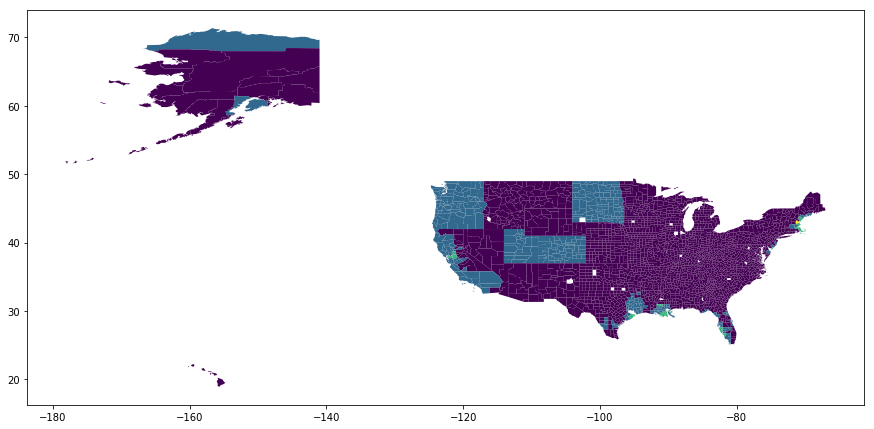

In [294]:
counties2.plot(column='Coastal Storm', figsize=(15,15));